# SWMAL Exercise

## Pipelines

We now try building af ML pipeline. The data for this exercise is the same as in L01, meaning that the OECD data from the 'intro.ipynb' have been save into a Python 'pickle' file. 

The pickle library is a nifty data preservation method in Python, and from L01 the tuple `(X, y)` have been stored to the pickle file `itmal_l01_data.pkl', try reloading it..

In [17]:
%matplotlib inline

import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def LoadDataFromL01():
    filename = os.path.join("../UndervisningsGit/GITMAL/datasets/pipeline/itmal_l01_data.pkl")
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


###  Revisiting the problem with the MLP

Using the MLP for the QECD data in Qd) from `intro.ipynb` produced a negative $R^2$, meaning that it was unable to fit the data, and the MPL model was actually _worse_ than the naive $\hat y$ (mean value of y).

Let's just revisit this fact. When running the next cell you should now see an OK $~R^2_{lin.reg}~$ score and a negative $~R^2_{mlp}~$ score..

The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-4.49

OK


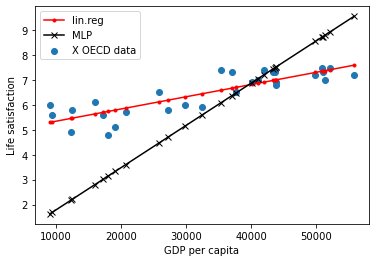

In [18]:
# Setup the MLP and lin. regression again..

def isNumpyData(t: np.ndarray, expected_ndim: int):
    assert isinstance(expected_ndim, int), f"input parameter 'expected_ndim' is not an integer but a '{type(expected_ndim)}'"
    assert expected_ndim>=0, f"expected input parameter 'expected_ndim' to be >=0, got {expected_ndim}"
    if t is None:
        print("input parameter 't' is None", file=sys.stderr)
        return False
    if not isinstance(t, np.ndarray):
        print("excepted numpy.ndarray got type '{type(t)}'", file=sys.stderr)
        return False
    if not t.ndim==expected_ndim:
        print("expected ndim={expected_ndim} but found {t.ndim}", file=sys.stderr)
        return False
    return True

def PlotModels(model1, model2, X: np.ndarray, y: np.ndarray, name_model1: str, name_model2: str):
    
    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return y_pred_model, score_model    

    assert isinstance(name_model1, str) and isinstance(name_model2, str)

    y_pred_model1, score_model1 = CalcPredAndScore(model1, X, y)
    y_pred_model2, score_model2 = CalcPredAndScore(model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{(name_model1).rjust(l)}.score(X, y)={score_model1:0.2f}")
    print(f"{(name_model2).rjust(l)}.score(X, y)={score_model2:0.2f}")

# lets make a linear and MLP regressor and redo the plots
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y, "lin.reg", "MLP")
print("\nOK")

### Qa) Create a Min/max scaler for the MLP

Now, the neurons in neural networks normally expect input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range then the neuron will saturate to its min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. Af fix to the problem in Qd), from `intro.ipynb`, is to preprocess data by scaling it down to something more sensible.

Try to manually scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

(If you already made exercise "Qe) Neural Network with pre-scaling" in L01, then reuse Your work here!) 

Iteration 1, loss = 26.29062983
Iteration 2, loss = 26.25798335
Iteration 3, loss = 26.22533127
Iteration 4, loss = 26.19266760
Iteration 5, loss = 26.15998980
Iteration 6, loss = 26.12730508
Iteration 7, loss = 26.09461439
Iteration 8, loss = 26.06190518
Iteration 9, loss = 26.02917554
Iteration 10, loss = 25.99643266
Iteration 11, loss = 25.96368323
Iteration 12, loss = 25.93092714
Iteration 13, loss = 25.89816419
Iteration 14, loss = 25.86539412
Iteration 15, loss = 25.83260773
Iteration 16, loss = 25.79978991
Iteration 17, loss = 25.76696008
Iteration 18, loss = 25.73411911
Iteration 19, loss = 25.70126667
Iteration 20, loss = 25.66840239
Iteration 21, loss = 25.63552583
Iteration 22, loss = 25.60260061
Iteration 23, loss = 25.56963547
Iteration 24, loss = 25.53663475
Iteration 25, loss = 25.50360825
Iteration 26, loss = 25.47054457
Iteration 27, loss = 25.43745835
Iteration 28, loss = 25.40434324
Iteration 29, loss = 25.37114979
Iteration 30, loss = 25.33792091
Iteration 31, loss 

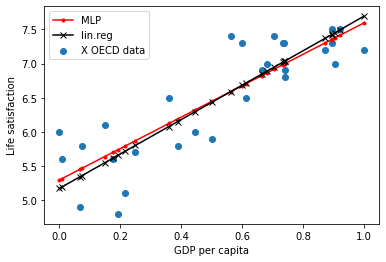

In [19]:
# TODO: add your code here..

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# X transformation
min_max_scaler = MinMaxScaler([0,1])
X_new = min_max_scaler.fit_transform(X)

mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X_new, y.ravel())

# create an test matrix M, with the same dimensionality as X, and in the range [0;1] 
# and a step size of your choice
m=np.linspace(0, 1, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# Prediction
pred = [[22000]]
mlp_pred = mlp.predict(pred)

# New linear regression
linregLMMS = LinearRegression()

linregLMMS.fit(X_new, y)

PlotModels(linregLMMS, mlp, X_new, y, "MLP","lin.reg")



### Qb) Scikit-learn Pipelines

Now, rescale again, but use the `sklearn.preprocessing.MinMaxScaler`.

When this works put both the MLP and the scaler into a composite construction via `sklearn.pipeline.Pipeline`. This composite is just a new Scikit-learn estimator, and can be used just like any other `fit-predict` models, try it, and document it for the journal.

(You could reuse the `PlotModels()` function by also retraining the linear regressor on the scaled data, or just write your own plot code.)

Iteration 1, loss = 25.52800527
Iteration 2, loss = 25.47493637
Iteration 3, loss = 25.42187677
Iteration 4, loss = 25.36886482
Iteration 5, loss = 25.31590272
Iteration 6, loss = 25.26299188
Iteration 7, loss = 25.21013339
Iteration 8, loss = 25.15719970
Iteration 9, loss = 25.10423761
Iteration 10, loss = 25.05132266
Iteration 11, loss = 24.99845716
Iteration 12, loss = 24.94555157
Iteration 13, loss = 24.89259421
Iteration 14, loss = 24.83968268
Iteration 15, loss = 24.78681944
Iteration 16, loss = 24.73400648
Iteration 17, loss = 24.68124543
Iteration 18, loss = 24.62853763
Iteration 19, loss = 24.57588418
Iteration 20, loss = 24.52328598
Iteration 21, loss = 24.47074375
Iteration 22, loss = 24.41825809
Iteration 23, loss = 24.36582947
Iteration 24, loss = 24.31345825
Iteration 25, loss = 24.26114470
Iteration 26, loss = 24.20888898
Iteration 27, loss = 24.15656650
Iteration 28, loss = 24.10419788
Iteration 29, loss = 24.05187399
Iteration 30, loss = 23.99959660
Iteration 31, loss 

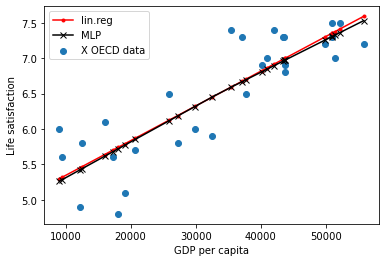

In [20]:
# TODO: add your code here..

from sklearn.pipeline import Pipeline

pipeLIN = Pipeline([
    ('scaler',MinMaxScaler()),
    ('linreg', LinearRegression()),
])


mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)

pipeMLP = Pipeline([
    ('scaler',MinMaxScaler()),
    ('linreg', mlp),
])

pipeLIN.fit(X,y)
pipeMLP.fit(X,y)


PlotModels(pipeLIN, pipeMLP, X, y, "lin.reg", "MLP")

### Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

Explain the fundamental problem with a min-max scaler and outliers. 
According to the documentation, the min-max scaler doesnt reduce the effect of outliers, it, however, scales all the "inliers" into a very narrow range, since the minimum value corresponds to the smallest outlier, and the maximum to the largest outliers. This can compress the "inliers" into a very small/narrow range, meaning the model still has to deal with "bad" values in the lower and upper limit.

Will a `sklearn.preprocessing.StandardScaler` do better here, in the case of abnormal feature values/outliers?

(Written BEFORE making a standardscaler)

It might, since it removes the mean, and only scales the data to its variance. This means that after the scaling, the empirical mean and deviation wont represent the "true" mean and deviation. This might make it unable to balance its scales correctly

(Written AFTER making a standardscaler)

It seems as if the MLP model with the standardscaler does handle the outliers in the data well, since it enables the MLP to more accurately fit the data (reflected in the higher $R^2$ score)

Iteration 1, loss = 25.90152803
Iteration 2, loss = 25.84544385
Iteration 3, loss = 25.78945568
Iteration 4, loss = 25.73356503
Iteration 5, loss = 25.67777337
Iteration 6, loss = 25.62208216
Iteration 7, loss = 25.56649278
Iteration 8, loss = 25.51100658
Iteration 9, loss = 25.45562488
Iteration 10, loss = 25.40034892
Iteration 11, loss = 25.34517989
Iteration 12, loss = 25.29011895
Iteration 13, loss = 25.23516719
Iteration 14, loss = 25.18032562
Iteration 15, loss = 25.12559523
Iteration 16, loss = 25.07097691
Iteration 17, loss = 25.01647153
Iteration 18, loss = 24.96207987
Iteration 19, loss = 24.90780266
Iteration 20, loss = 24.85364057
Iteration 21, loss = 24.79959420
Iteration 22, loss = 24.74566411
Iteration 23, loss = 24.69185078
Iteration 24, loss = 24.63815464
Iteration 25, loss = 24.58457608
Iteration 26, loss = 24.53111542
Iteration 27, loss = 24.47777291
Iteration 28, loss = 24.42457543
Iteration 29, loss = 24.37153570
Iteration 30, loss = 24.31861766
Iteration 31, loss 

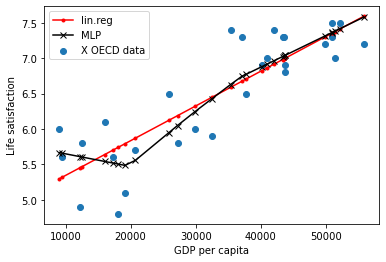

In [21]:
# TODO: research the problem here..

pipeLINSS = Pipeline([
    ('scaler',StandardScaler()),
    ('linreg', LinearRegression()),
])


mlpSS = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)

pipeMLPSS = Pipeline([
    ('scaler',StandardScaler()),
    ('linreg', mlpSS),
])

pipeLINSS.fit(X,y)
pipeMLPSS.fit(X,y)


PlotModels(pipeLINSS, pipeMLPSS, X, y, "lin.reg", "MLP")

### Qd) Modify the MLP Hyperparameters

Finally, try out some of the hyperparameters associated with the MLP.

Specifically, test how few neurons the MLP can do with---still producing a sensible output, i.e. high $R^2$. 

Also try-out some other activation functions, ala sigmoid, and solvers, like `sgd`.

Notice, that the Scikit-learn MLP does not have as many adjustable parameters, as a Keras MLP, for example, the Scikit-learn MLP misses neurons initialization parameters (p.333-334 [HOML,2nd], p.358-359 [HOML,3rd]) and the ELU activation function (p.336 [HOML,2nd], p.363 [HOML,3rd).

[OPTIONAL 1]: use a Keras MLP regressor instead of the Scikit-learn MLP (You need to install the  Keras if its not installed as default).

[OPTIONAL 2]: try out the `early_stopping` hyperparameter on the `MLPRegressor`. 

[OPTIONAL 3]: try putting all score-calculations into K-fold cross-validation  methods readily available in Scikit-learn using

* `sklearn.model_selection.cross_val_predict`
* `sklearn.model_selection.cross_val_score` 

or similar (this is, in theory, the correct method, but can be hard to use due to the  extremely small number of data points, `n=29`).

0.7344236961794932

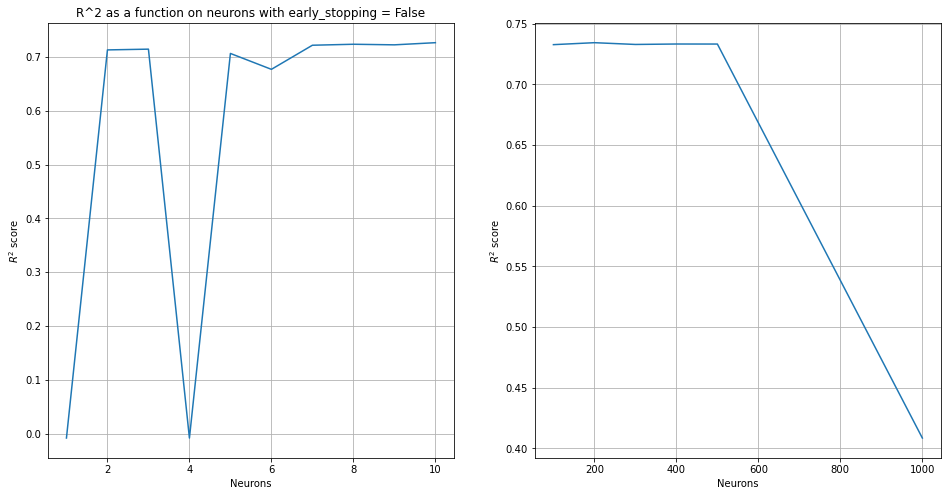

In [101]:
# TODO: add your code here..
# Stolen function
def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return score_model

Neurons = [1,2,3,4,5,6,7,8,9,10,100,200,300,400,500,1000]

MLPScores = []

for Neuron in Neurons:
    mlp = MLPRegressor( hidden_layer_sizes=(Neuron,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False, early_stopping=False)

    pipeMLP = Pipeline([
        ('scaler', MinMaxScaler()),
        ('linreg', mlp),
    ])


    pipeMLP.fit(X,y)

    MLPScores.append(CalcPredAndScore(pipeMLP, X, y))


plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
plt.plot(Neurons[:10], MLPScores[:10])
plt.title("R^2 as a function on neurons with early_stopping = False")
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Neurons[10:], MLPScores[10:])
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
np.max(MLPScores)



0.7350426693000259

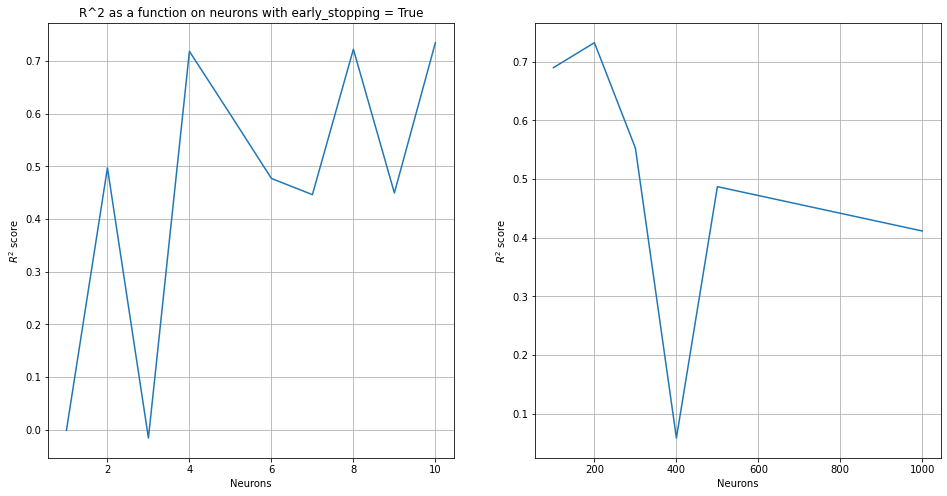

In [100]:
Neurons = [1,2,3,4,5,6,7,8,9,10,100,200,300,400,500,1000]

MLPScores = []

for Neuron in Neurons:
    mlp = MLPRegressor( hidden_layer_sizes=(Neuron,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False, early_stopping=True)

    pipeMLP = Pipeline([
        ('scaler', MinMaxScaler()),
        ('linreg', mlp),
    ])


    pipeMLP.fit(X,y)

    MLPScores.append(CalcPredAndScore(pipeMLP, X, y))


plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
plt.plot(Neurons[:10], MLPScores[:10])
plt.title("R^2 as a function on neurons with early_stopping = True")
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Neurons[10:], MLPScores[10:])
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
np.max(MLPScores)

 Sigmoid function

0.45667877208340046

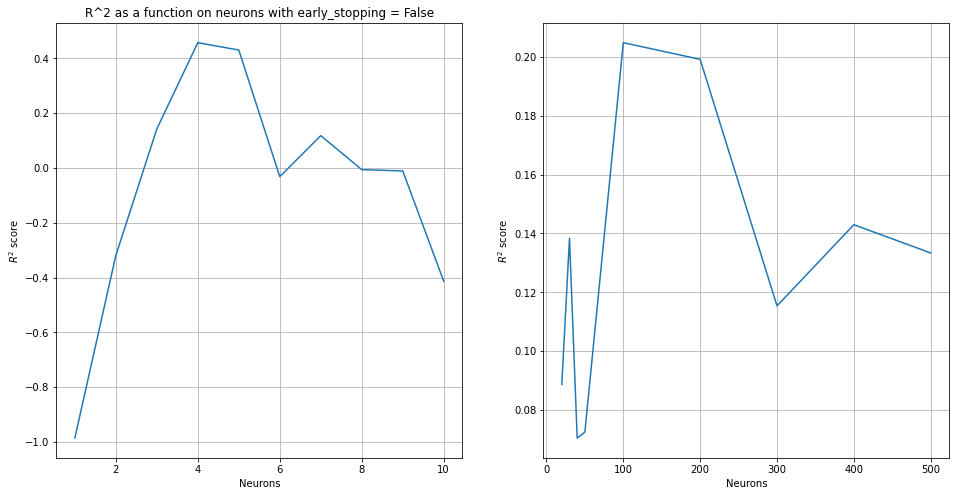

In [93]:
Neurons = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,200,300,400,500]

MLPScoresSGD = []

for Neuron in Neurons:
    mlp = MLPRegressor( hidden_layer_sizes=(Neuron,), solver='sgd', activation='relu', tol=1E-5, max_iter=100000, verbose=False, early_stopping=False)

    pipeMLP = Pipeline([
        ('scaler', MinMaxScaler()),
        ('linreg', mlp),
    ])


    pipeMLP.fit(X,y)

    MLPScoresSGD.append(CalcPredAndScore(pipeMLP, X, y))

plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
plt.plot(Neurons[:10], MLPScoresSGD[:10])
plt.title("R^2 as a function on neurons with early_stopping = False")
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Neurons[10:], MLPScoresSGD[10:])
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
np.max(MLPScores)

np.max(MLPScoresSGD)




0.7335950065670835

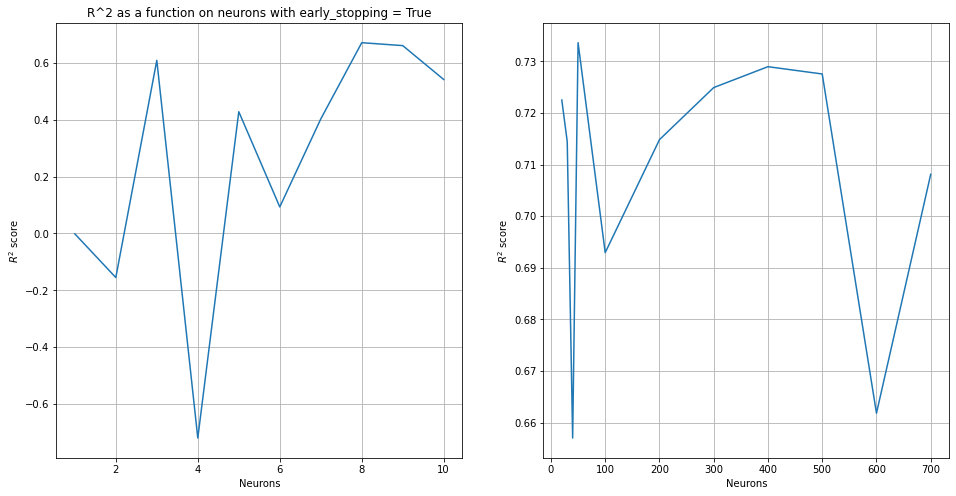

In [97]:
Neurons = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,200,300,400,500,600,700]

MLPScoresSGD = []

for Neuron in Neurons:
    mlp = MLPRegressor( hidden_layer_sizes=(Neuron,), solver='sgd', activation='relu', tol=1E-5, max_iter=100000, verbose=False, early_stopping=True)

    pipeMLP = Pipeline([
        ('scaler', MinMaxScaler()),
        ('linreg', mlp),
    ])


    pipeMLP.fit(X,y)

    MLPScoresSGD.append(CalcPredAndScore(pipeMLP, X, y))

plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
plt.plot(Neurons[:10], MLPScoresSGD[:10])
plt.title("R^2 as a function on neurons with early_stopping = True")
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Neurons[10:], MLPScoresSGD[10:])
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
np.max(MLPScores)

np.max(MLPScoresSGD)

REVISIONS||
:-|:-|
2020-10-15| CEF, initial. 
2020-10-21| CEF, added Standard Scaler Q.
2020-11-17| CEF, removed orhpant text in Qa (moded to Qc).
2021-02-10| CEF, updated for ITMAL F21.
2021-11-08| CEF, updated print info.
2021-02-10| CEF, updated for SWMAL F22.
2023-02-19| CEF, updated for SWMAL F23, adjuste page numbers for 3rd.ed.
2023-02-21| CEF, added types, rewrote CalcPredAndScore and added isNumpyData.